In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import math
import pandas as pd
import numpy as np
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import Scatter, Figure, Layout
from plotly.graph_objs import *
init_notebook_mode(connected=True)

In [2]:
sheepfile = nx.read_graphml('sheep_ml.graphml')

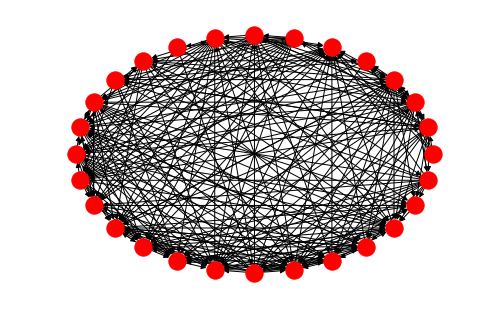

In [3]:
nx.draw_shell(sheepfile)

In [4]:
nodes = pd.read_csv('sheep_data/sheep_age.csv')
edges = pd.read_csv('sheep_data/sheep_edges.csv')

In [5]:
sheeps = nx.DiGraph()
for i in nodes.index:
    sheeps.add_node(nodes.iloc[i]['id'],age = nodes.iloc[i]['age'])

In [6]:
edges['ebunch'] = '0'
for i in edges.index.values:
    edges.at[i,'ebunch'] = (edges.iloc[i]['source'],edges.iloc[i]['target'],{'weight':edges.iloc[i]['weight']})
edges.head()

,source,target,weight,ebunch
0,1,2,1,"(1, 2, {'weight': 1})"
1,1,3,1,"(1, 3, {'weight': 1})"
2,1,4,1,"(1, 4, {'weight': 1})"
3,1,5,1,"(1, 5, {'weight': 1})"
4,1,6,1,"(1, 6, {'weight': 1})"


In [7]:
## [(edges.iloc[i]['source'],edges.iloc[i]['target'],{'weight':edges.iloc[i]['weight']}) for i in edges.index]
sheeps.add_edges_from(edges['ebunch'].values)

In [8]:
colorlist = ['#f7fcfd','#e0ecf4','#bfd3e6','#9ebcda','#8c96c6','#8c6bb1','#88419d','#810f7c','#4d004b']
colorlist2 = ['#fee090','#fdae61','#f46d43','#d73027','#a50026']
colorlist3 = ['#c7e9c0','#a1d99b','#74c476','#41ab5d','#238b45']
colormap = [colorlist[i-1] for i in nodes['age'].values]
colormap2 = [colorlist2[int(math.ceil(i/2)-1)] for i in nodes['age'].values]
colormap3 = [colorlist3[int(math.ceil(i/2)-1)] for i in nodes['age'].values]

In [9]:
pgrank = nx.pagerank(sheeps)
pgrank_invert = {i:35/pgrank[i] for i in list(pgrank.keys())}

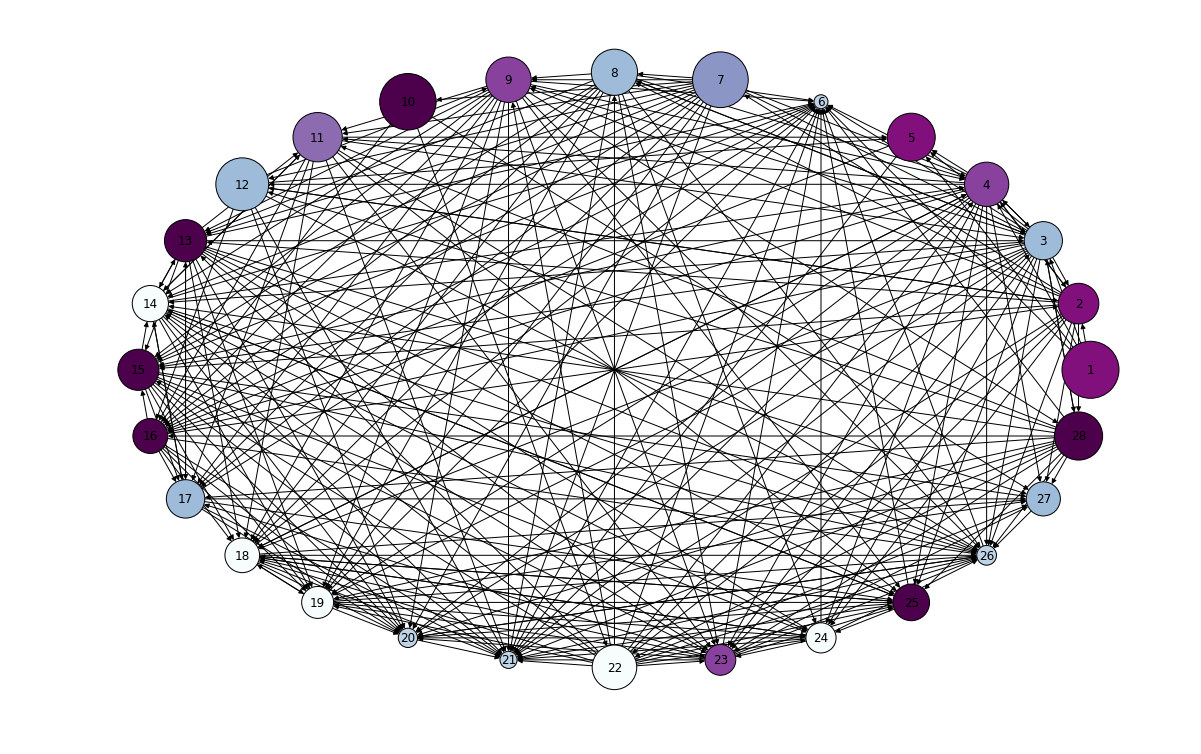

In [10]:
plt.figure(figsize = (16,10))
# plt.figure(figsize = (9,5))

# nx.draw_shell(sheeps,with_labels=True,node_size=[sheeps.nodes[i]['age']*200 for i in range(1,29)])
nx.draw_shell(sheeps,node_color=colormap,with_labels=True,node_size=list(pgrank_invert.values()))
ax = plt.gca()
ax.collections[0].set_edgecolor("#000000") 
# pos=nx.get_node_attributes(sheeps,'pos')
# labels = nx.get_edge_attributes(sheeps,'weight')
# nx.draw_networkx_edge_labels(sheeps,pos,edge_labels=labels)

In [11]:
sheeps[10]

AtlasView({22: {'weight': 1}, 16: {'weight': 1}, 27: {'weight': 1}})

In [12]:
agesbins = ['1-2','3-4','5-6','7-8','9']
agecolors = dict(zip(agesbins, colorlist3))

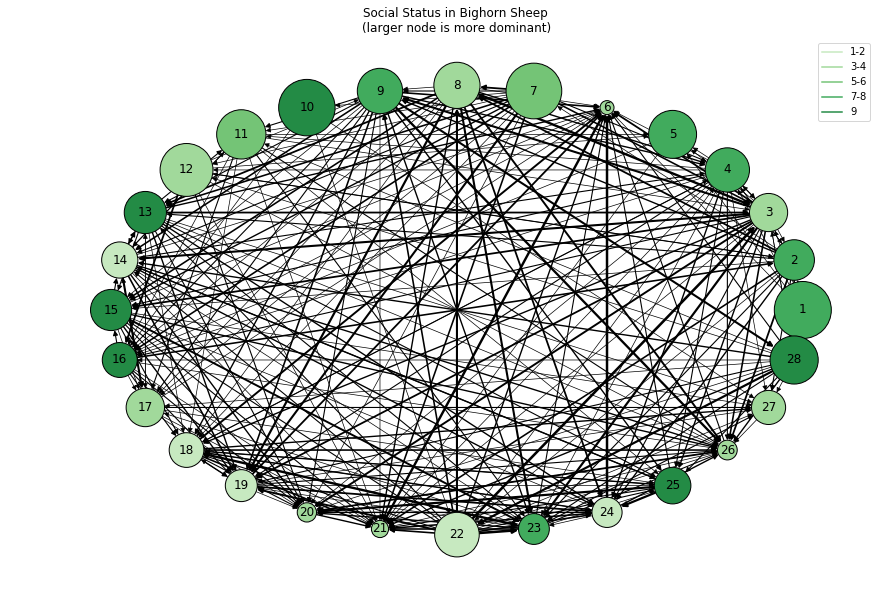

In [15]:
# plt.figure(figsize = (15,10))


# colors = [sheeps[u][v]['color'] for u,v in sheeps.edges()]
weights = [np.log1p(sheeps[u][v]['weight']) for u,v in sheeps.edges()]
# weights = [sheeps[u][v]['weight'] for u,v in sheeps.edges()]

# ages = [sheeps.nodes[i]['age']*200 for i in range(1,29)]

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
for label in agesbins:
    ax.plot([0],[0],color=(agecolors[label]),label=label)

nx.draw_shell(sheeps,with_labels=True, node_color=colormap3,node_size=list(pgrank_invert.values()), edges = sheeps.edges,width=weights)
ax.collections[0].set_edgecolor("#000000") 
plt.title('Social Status in Bighorn Sheep \n(larger node is more dominant)')
plt.legend()
plt.show()
plt.tight_layout()
# ax.savefig('~/Desktop/sheeps.jpg')
plt.savefig('sheeps.png')

In [15]:
import copy

In [16]:
G = copy.deepcopy(sheeps)

In [28]:
import json

In [29]:
from networkx.readwrite import json_graph
data = json_graph.node_link_data(G)
with open('graph.json', 'w') as f:
    json.dump(data, f, indent=4)

In [34]:
from http.server import HTTPServer
HTTPServer.load_url('graph.json')

AttributeError: type object 'HTTPServer' has no attribute 'load_url'

In [17]:

G=nx.random_geometric_graph(200,0.125)
pos=nx.get_node_attributes(G,'pos')

dmin=1
ncenter=0
for n in pos:
    x,y=pos[n]
    d=(x-0.5)**2+(y-0.5)**2
    if d<dmin:
        ncenter=n
        dmin=d

p=nx.single_source_shortest_path_length(G,ncenter)

In [18]:
edge_trace = Scatter(
    x=[],
    y=[],
    line=Line(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = G.node[edge[0]]['pos']
    x1, y1 = G.node[edge[1]]['pos']
    edge_trace['x'] += [x0, x1, None]
    edge_trace['y'] += [y0, y1, None]

node_trace = Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=Marker(
        showscale=True,
        # colorscale options
        # 'Greys' | 'Greens' | 'Bluered' | 'Hot' | 'Picnic' | 'Portland' |
        # Jet' | 'RdBu' | 'Blackbody' | 'Earth' | 'Electric' | 'YIOrRd' | 'YIGnBu'
        colorscale='YIGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))

for node in G.nodes():
    x, y = G.node[node]['pos']
    node_trace['x'].append(x)
    node_trace['y'].append(y)

In [19]:
adjacency_list = list(sheeps.adjacency())

In [20]:
for node, adjacencies in enumerate(adjacency_list):
    node_trace['marker']['color'].append(len(adjacencies))
    node_info = '# of connections: '+str(len(adjacencies))
    node_trace['text'].append(node_info)

In [26]:

fig = Figure(data=Data([edge_trace, node_trace]),
             layout=Layout(
                title='<br>Network graph made with Python',
                titlefont=dict(size=16),
                showlegend=True,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
#                     text="Python code: <a href='https://plot.ly/ipython-notebooks/network-graphs/'> https://plot.ly/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=XAxis(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=YAxis(showgrid=False, zeroline=False, showticklabels=False)))

iplot(fig)

In [ ]:
plt.figure(figsize = (15,10))


# colors = [sheeps[u][v]['color'] for u,v in sheeps.edges()]
weights = [np.log1p(sheeps[u][v]['weight']) for u,v in sheeps.edges()]

nx.draw_shell(sheeps,with_labels=True,node_size=hits_invert.values(), edges = sheeps.edges,width=weights)
# nx.draw_networkx_edges(sheeps,edgelist=sheeps.edges,width=[sheeps.edges[i]['age'] for i in range(1,len(sheeps.edges))])

todo:
age of sheep:  color
elo of sheep: size?. Can't use thsi. use invert_pagerank instead?
distinguish wins from losses (nx.digraph)


In [ ]:
sheeps.edges

In [ ]:
nx.draw_networkx?

In [ ]:
sheeps.nodes[1]['age']

In [ ]:
# hubs = nx.hits(sheeps)[0]
# authorities = nx.hits(sheeps)[1]
# hits_invert = {i:50/(hubs[i]+authorities[i]) for i in range(1,29)}
# hits_invert = {i:10/(authorities[i]+0.001) for i in range(1,29)}